# Google Play Store EDA

### _Разведочный анализ мобильных приложений из Google Play Store_

## Введение

    
### Содержание таблицы:
    
* **App** - название приложения

* **Category** - категория

* **Rating** - рейтинг

* **Reviews** - количество отзывов

* **Size** - размер приложения

* **Installs** - количество скачиваний

* **Type** - тип приложения (Платное/Бесплатное)

* **Price** - цена

* **Content Rating** - возрастная категория

* **Genres** - жанры приложения

* **Last Updated** - дата последнего обновления приложения

* **Current Ver** - текущая версия приложения

* **Android Ver** - совместимые с приложением версии Android
   

### Задачи:
    

* Подготовить данные к работе 

* Провести разведочный анализ данных

* Сгенерировать полезные для бизнеса гипотезы и проверить их

* Сформулировать выводы проведенного исследования

In [1]:
# Импортируем всё необходимое
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
# Игнорируем некоторые предупреждения
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Устанавливаем цветовую палитру
sns.set_palette(sns.cubehelix_palette(66, start=.5, rot=-.75)[31:])

In [4]:
# Импортируем таблицу с данными
apps = pd.read_csv('googleplaystore.csv')

In [5]:
# Заглянем в таблицу
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Нас интересует рейтинг приложений и кол-во их скачиваний. Нам хочется понять, какие приложения получают много скачиваний и высокий рейтинг

Для этого мы изучим то, как другие переменные вляют на них, и как все переменные взаимосвязаны

Проанализировав имеющиеся данные, проверим несколько гипотез и выделим наиболее значимые инсайты

Но сначала подготовим данные к работе

# Очистка и форматирование данных

### Удаление дубликатов

In [6]:
# Выведем информацию о названиях приложений
apps.App.describe()

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

В таблице есть повторяющиеся приложения

In [7]:
# Выведем все повторяющиеся приложения
pd.DataFrame(apps.groupby('App').App.count().loc[apps.groupby('App').App.count() > 1])\
    .rename(columns={'App': 'Count'}).reset_index().sort_values(by='Count', ascending=False)

,App,Count
570,ROBLOX,9
102,"CBS Sports App - Scores, News, Stats & Watch Live",8
211,Duolingo: Learn Languages Free,7
218,ESPN,7
6,8 Ball Pool,7
...,...,...
301,Golfshot: Golf GPS + Tee Times,2
302,Google,2
305,Google Analytics,2
311,Google Duo - High Quality Video Calls,2


798 приложений появляются больше одного раза

In [8]:
apps[apps.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [9]:
apps[apps.App == 'Google']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3234,Google,TOOLS,4.4,8033493,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
4150,Google,TOOLS,4.4,8021623,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


Дубликаты приложений отличаются количеством отзывов, и некоторые еще категорией. Удалим дубликаты

In [10]:
apps.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [11]:
# Перепроверим, что дубликатов не осталось
apps.App.describe()

count                                               9660
unique                                              9660
top       Photo Editor & Candy Camera & Grid & ScrapBook
freq                                                   1
Name: App, dtype: object

### Удаляем малоинформативные признаки

In [12]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Удалим признаки "Current Ver", "Last Updated" и "Android Ver". Версия приложения ни о чем нам не говорит. Дата последнего обновления и версия андроида малоинформативны

In [13]:
apps.drop(columns=['Current Ver', 'Android Ver', 'Last Updated'], inplace=True)

Мы не знаем содержание отзывов, только их количество. Вряд ли с такой информацией получится сделать адекватных вывод о взаимосвязи отзывов с другими переменными. Поэтому столбец Reviews удалим

In [14]:
apps.drop(columns=['Reviews'], inplace=True)

### Избавляемся от Null значений

In [15]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Size            9660 non-null   object 
 4   Installs        9660 non-null   object 
 5   Type            9659 non-null   object 
 6   Price           9660 non-null   object 
 7   Content Rating  9659 non-null   object 
 8   Genres          9660 non-null   object 
dtypes: float64(1), object(8)
memory usage: 754.7+ KB


Rating, Type и Content Rating имеют null значения

In [16]:
# Посмотрим на приложения без рейтинга
apps[apps.Rating.isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,2.9M,"10,000+",Free,0,Mature 17+,Beauty
...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,82M,"10,000+",Free,0,Everyone,Medical
10825,Naruto & Boruto FR,SOCIAL,NaN,7.7M,100+,Free,0,Teen,Social
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation
10835,FR Forms,BUSINESS,NaN,9.6M,10+,Free,0,Everyone,Business


In [17]:
print('Приложения без рейтинга составляют ', round(100 * apps[apps.Rating.isnull()].App.count() / apps.App.count(), 2),
      '%', sep='')

Приложения без рейтинга составляют 15.14%


Приложения без рейтинга имеют отличающиеся друг от друга категории, количества скачиваний и другие признаки, то есть отсутствие рейтинга не связано с каким-то конкретным значением того или иного признака

Приложения без рейтинга составляют немалую часть всех данных (15%), но их присутствие затруднит дальнейшую работу. Можно было бы заменить пропущенные данные средним значением рейтинга, но я предпочту удалить строки с пропусками

In [18]:
apps.drop(apps[apps.Rating.isnull()].index, inplace=True)

In [19]:
# Проверим, остались ли null значения
apps[apps.Type.isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres


In [20]:
# Проверяем, есть ли приложения без Content Rating
apps[apps['Content Rating'].isnull()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


Приложение без Content Rating всего одно. Другие его признаки находятся не в тех колонках. Удалим это приложение

In [21]:
apps.drop(apps.loc[apps.App == 'Life Made WI-Fi Touchscreen Photo Frame'].index, inplace=True)

In [22]:
# Перепроверим, остались ли в таблице null значения
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Size            8196 non-null   object 
 4   Installs        8196 non-null   object 
 5   Type            8196 non-null   object 
 6   Price           8196 non-null   object 
 7   Content Rating  8196 non-null   object 
 8   Genres          8196 non-null   object 
dtypes: float64(1), object(8)
memory usage: 640.3+ KB


### Форматируем данные

In [23]:
# Проверим категории на ошибки и опечатки
apps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [24]:
# Посмотрим, какие значения Size бывают
apps.Size.value_counts()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

Нужно сделать что-то с "Varies from device", а также конвертировать все значения в мегабайты. "Varies" заменим средним значением

In [25]:
# Временно заменяем на NaN, чтобы посчитать среднее остальных значений
apps.loc[apps.Size == 'Varies with device', 'Size'] = 'NaN'

In [26]:
# Приводим все значения к одному формату
apps.Size=apps.Size.str.replace('k','e+3')
apps.Size=apps.Size.str.replace('M','e+6')

In [27]:
apps.Size.value_counts()

NaN       1169
14e+6      149
12e+6      146
11e+6      144
13e+6      143
          ... 
383e+3       1
454e+3       1
812e+3       1
442e+3       1
619e+3       1
Name: Size, Length: 414, dtype: int64

In [28]:
# Конвертируем Size в числовой формат
apps.Size = apps.Size.apply(lambda x: float(x))

In [29]:
# Заменяем пропущенные значения средним
apps['Size'].fillna(apps.groupby('Category')['Size'].transform('mean'),inplace = True)

In [30]:
# Проверяем, что не осталось пропущенных значений
apps.Size.isnull().sum()

0

In [31]:
# Проверяем, что нет приложений размером 0
apps[apps.Size == 0]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres


In [32]:
# Выражаем размер всех приложений в Мб
apps.Size = apps.Size.apply(lambda x: round(x / 1000000, 2))

In [33]:
# Указываем в названии столбца единицы измерения
apps.rename(columns={'Size': 'Size_Mb'}, inplace=True)

In [34]:
apps.sample(10)

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content Rating,Genres
9823,Esto Es Guerra TVN,FAMILY,4.5,13.00,"100,000+",Free,0,Everyone,Entertainment
2396,Registered Dietitian Pocket Prep,MEDICAL,4.3,12.00,"5,000+",Free,0,Everyone,Medical
10409,studentsLife by FH Kärnten,FAMILY,4.4,28.97,"5,000+",Free,0,Everyone,Education
4943,Ad Detect Plugin - Handy Tool,PRODUCTIVITY,3.8,1.40,"500,000+",Free,0,Everyone,Productivity
6306,BJ's Wholesale Club,SHOPPING,4.2,17.00,"100,000+",Free,0,Everyone,Shopping
3748,Apple Daily Apple News,NEWS_AND_MAGAZINES,3.4,25.00,"5,000,000+",Free,0,Teen,News & Magazines
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,14.00,"100,000+",Free,0,Everyone,Art & Design
817,Homework Planner,EDUCATION,4.0,1.20,"100,000+",Free,0,Everyone,Education
4868,Daily Ab Workout,HEALTH_AND_FITNESS,4.6,21.93,"50,000+",Paid,$1.99,Everyone,Health & Fitness
115,Photo Editor 2018,BEAUTY,4.5,17.00,"10,000+",Free,0,Everyone,Beauty


In [35]:
# Далее посмотрим, какие значения может принимать Installs
apps.Installs.value_counts()

1,000,000+        1415
100,000+          1094
10,000+            987
10,000,000+        937
1,000+             697
5,000,000+         607
500,000+           504
50,000+            457
5,000+             425
100+               303
50,000,000+        202
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

Конвертируем значения скачиваний в числовой формат

In [36]:
apps.Installs=apps.Installs.apply(lambda x: x.strip('+'))
apps.Installs=apps.Installs.apply(lambda x: x.replace(',',''))

In [37]:
apps.Installs=pd.to_numeric(apps.Installs)

In [38]:
apps.Installs.value_counts()

1000000       1415
100000        1094
10000          987
10000000       937
1000           697
5000000        607
500000         504
50000          457
5000           425
100            303
50000000       202
500            199
100000000      188
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

Понятно, что новые значения - определенная условность, т.к. изначально кол-ва скачиваний по сути были разбиты на бакеты, значения в которых несколько превышали те, которые есть сейчас. Конвертация в числовой формат нужна для будущего анализа, чтобы можно было сравнивать значения скачиваний различных приложений между собой

In [39]:
# Посмотрим, какие значения есть в Type
apps.Type.value_counts()

Free    7592
Paid     604
Name: Type, dtype: int64

In [40]:
# Изучим значения в Price
apps.Price.value_counts()

0          7592
$2.99       109
$0.99       104
$4.99        68
$1.99        59
           ... 
$1.59         1
$6.49         1
$1.29         1
$299.99       1
$1.20         1
Name: Price, Length: 73, dtype: int64

Конвертируем стоимость в числовой формат

In [41]:
apps.Price=apps.Price.apply(lambda x: x.strip('$'))

In [42]:
apps.Price=pd.to_numeric(apps.Price)

Проверим, есть ли приложения типа "Free" с ценой > 0 и наоборот

In [43]:
apps[(apps.Type == 'Free') & (apps.Price > 0)]

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [44]:
apps[(apps.Type == 'Paid') & (apps.Price == 0)]

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [45]:
# Проверим, есть ли приложения с отрицательной ценой
apps[(apps.Type == 'Paid') & (apps.Price < 0)]

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content Rating,Genres


In [46]:
# Посмотрим значения Content Rating
apps['Content Rating'].value_counts()

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Уберем пробел в названии столбца, чтобы к нему можно было в будущем обращаться через точку, и чтобы у названий столбцов сохранялся общий стиль

In [47]:
apps.rename(columns={'Content Rating' : 'Content_Rating'}, inplace=True)

In [48]:
# Заглянем в Genres
apps.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

Большинство приложений имеют в столбце Genres два жанра. Поэтому разделим столбец на два

In [49]:
primary = apps.Genres.apply(lambda x: x.split(';')[0])
apps['Primary_Genres'] = primary

In [50]:
secondary = apps.Genres.apply(lambda x: x.split(';')[-1])
apps['Secondary_Genres'] = secondary

In [51]:
# Удалим старый столбец
apps.drop(columns=['Genres'], inplace=True)

In [52]:
apps.head()

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content_Rating,Primary_Genres,Secondary_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19.0,10000,Free,0.0,Everyone,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,14.0,500000,Free,0.0,Everyone,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7,5000000,Free,0.0,Everyone,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25.0,50000000,Free,0.0,Teen,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8,100000,Free,0.0,Everyone,Art & Design,Creativity


In [53]:
# Изучим значения Primary_Genres
apps.Primary_Genres.value_counts()

Tools                      718
Entertainment              502
Education                  498
Action                     304
Lifestyle                  302
Finance                    302
Productivity               301
Personalization            298
Medical                    290
Sports                     270
Business                   263
Photography                263
Communication              257
Health & Fitness           246
Casual                     217
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     123
Maps & Navigation          118
Role Playing               111
Racing                     103
Strategy                    95
Food & Drink                94
Educational                 93
Adventure                   78
Auto & V

In [54]:
apps[apps.Primary_Genres == 'Music & Audio']

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content_Rating,Primary_Genres,Secondary_Genres
2142,Toy Guitar with songs for kids,FAMILY,4.3,9.8,500000,Free,0.0,Everyone,Music & Audio,Music & Video


Приложение с жанром Music & Audio представлено в единственном числе и по своему смыслу соответствует уже существующему жанру Music. Поэтому сменим его жанр на Music

In [55]:
apps.loc[apps.Primary_Genres == 'Music & Audio', 'Primary_Genres'] = 'Music'

Сравним значения в столбцах Category, Primary_Genres и Secondary_Genres

In [56]:
apps.Category.value_counts().head(10)

FAMILY             1608
GAME                912
TOOLS               718
FINANCE             302
PRODUCTIVITY        301
LIFESTYLE           301
PERSONALIZATION     298
MEDICAL             290
BUSINESS            263
PHOTOGRAPHY         263
Name: Category, dtype: int64

In [57]:
apps.Primary_Genres.value_counts().head(10)

Tools              718
Entertainment      502
Education          498
Action             304
Lifestyle          302
Finance            302
Productivity       301
Personalization    298
Medical            290
Sports             270
Name: Primary_Genres, dtype: int64

In [58]:
apps.Secondary_Genres.value_counts().head(10)

Tools              717
Education          518
Entertainment      471
Finance            302
Productivity       301
Lifestyle          300
Personalization    298
Action             292
Medical            290
Sports             266
Name: Secondary_Genres, dtype: int64

Значения столбцов Category, Primary_Genres и Secondary_Genres очень похожи и могут совпадать для определенных приложений. Поэтому удалим столбцы Primary_Genres и Secondary_Genres

In [59]:
apps.drop(columns=['Primary_Genres'], inplace=True)

In [60]:
apps.drop(columns=['Secondary_Genres'], inplace=True)

### Итоговая таблица иммет следующий вид:

In [61]:
apps.sample(10)

,App,Category,Rating,Size_Mb,Installs,Type,Price,Content_Rating
7717,CQ,NEWS_AND_MAGAZINES,3.7,3.40,1000,Free,0.0,Everyone 10+
3369,"Emoji Keyboard - Cute Emoji,GIF, Sticker, Emot...",PERSONALIZATION,4.7,20.00,10000000,Free,0.0,Everyone
3637,Weather Crave,WEATHER,4.2,44.00,5000000,Free,0.0,Everyone
2329,fred's Pharmacy,MEDICAL,3.0,22.00,100000,Free,0.0,Everyone
4332,EXO-L Amino for EXO Fans,SOCIAL,4.9,67.00,50000,Free,0.0,Teen
7780,Stats Royale for Clash Royale,BOOKS_AND_REFERENCE,4.5,16.00,1000000,Free,0.0,Everyone
7444,CJ the REALTOR,BUSINESS,5.0,4.20,10,Free,0.0,Everyone
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,0.09,100000,Free,0.0,Everyone
4706,V BTS Wallpaper,PERSONALIZATION,4.7,9.50,5000,Free,0.0,Everyone
6189,Bg+ Call Blocker,TOOLS,4.3,1.70,10000,Free,0.0,Everyone


# Разведочный анализ данных

## Количественные признаки

### Pairplot для количественных признаков

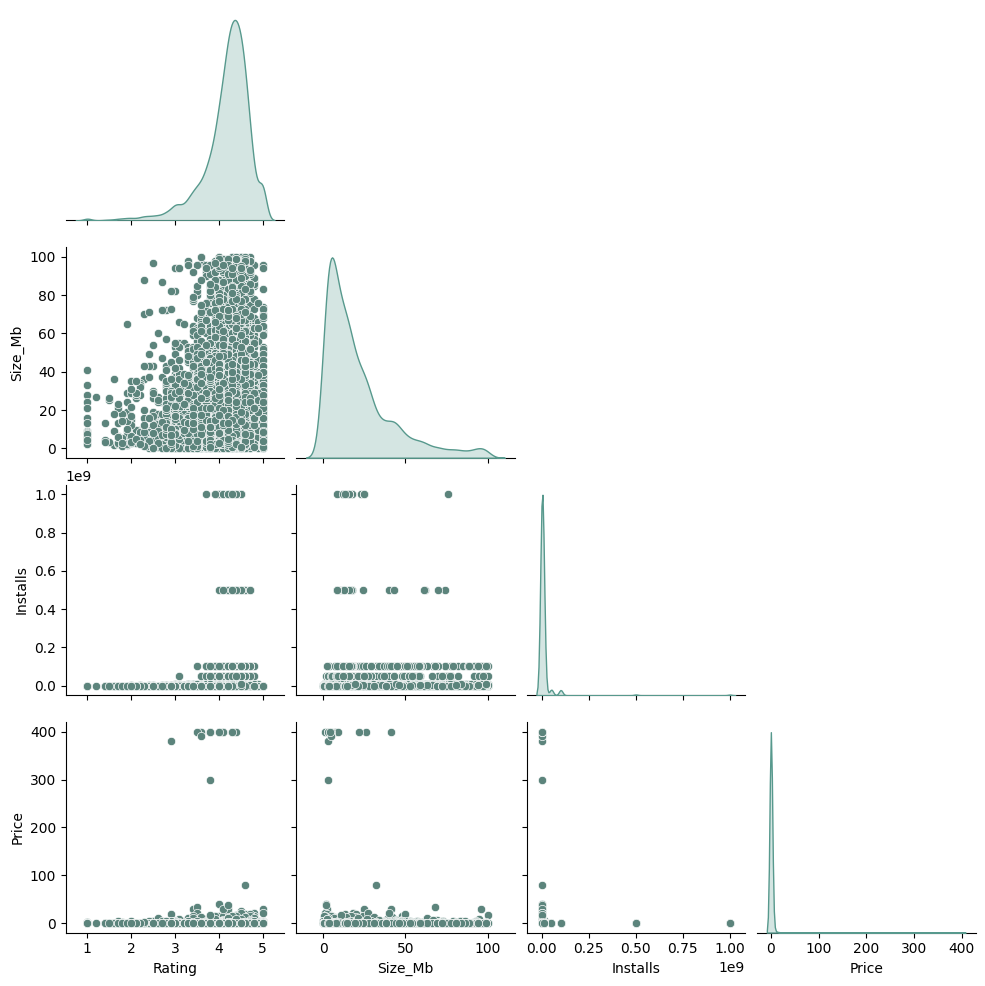

In [62]:
sns.pairplot(apps, corner=True, diag_kind='kde', plot_kws={'color': '#5c847c'})
plt.show()

#### Как видим, все количественные признаки распределены не нормально

### Посмотрим, как количественные признаки коррелируют друг с другом

Используем коэффициент корреляции Спирмена, поскольку признаки распределены не нормально

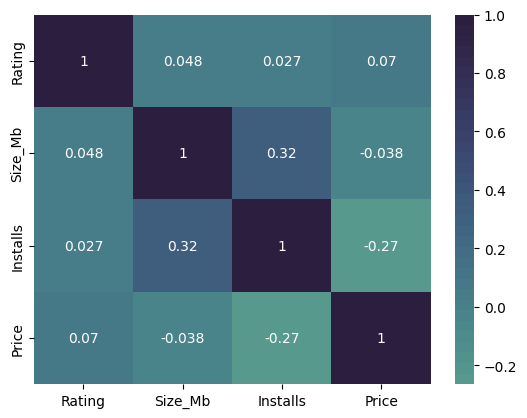

In [63]:
sns.heatmap(apps.corr(method='spearman'), annot=True, cmap=sns.cubehelix_palette(66, start=.5, rot=-.75)[31:])
plt.show()

Как видим, есть сильная корреляция между признаками "Installs" и "Price" (-0.27), и признаками "Size_Mb" и "Installs" (0.32)

Взаимосвязь между кол-вом установок  и ценой легко объяснима: бесплатные приложения скачивают чаще, чем платные, а среди платных, чем дороже приложение, тем меньше людей хотят/могут его купить

Про взаимосвязь размера приложения и кол-ва его установок пока что ничего с уверенностью сказать нельзя

## Категориальные признаки

### Category

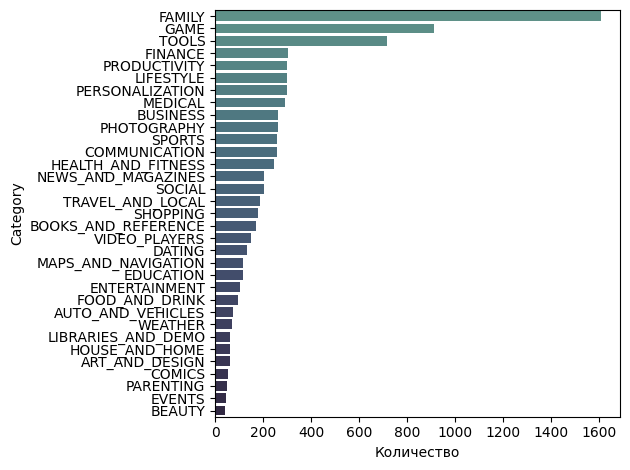

In [64]:
sns.countplot(y=apps.Category, order=apps['Category'].value_counts().index)
plt.tight_layout()
plt.xlabel('Количество')
plt.show()

#### Больше всего приложений в категориях Family, Game и Tools

### Type (Free/Paid)

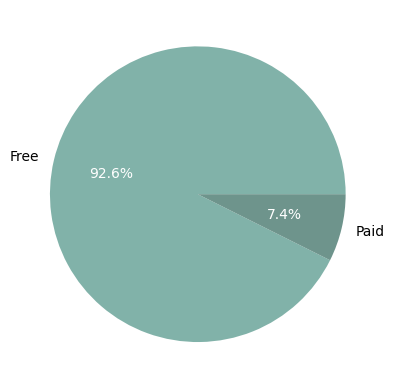

In [65]:
patches, texts, autotexts = plt.pie(apps['Type'].value_counts(sort=True),
                            labels=apps['Type'].value_counts(sort=True).index, autopct='%1.1f%%',
                            textprops={'color': 'white'}, colors=['#81b2a9', '#6e948c'])
for text in texts:
    text.set_color('black')

#### Бесплатные приложения сильно преобладают на рынке

### Content Rating

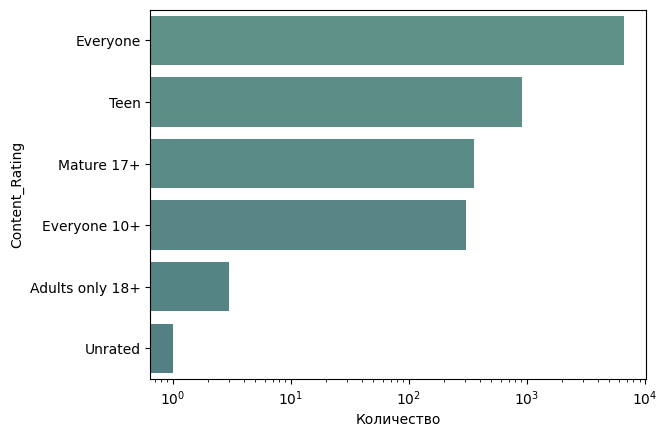

In [66]:
sns.countplot(y=apps.Content_Rating, order=apps['Content_Rating'].value_counts().index)
plt.xlabel('Количество')
plt.xscale('log')

#### На рынке преобладают приложения для всех возрастов (Everyone)

### Installs

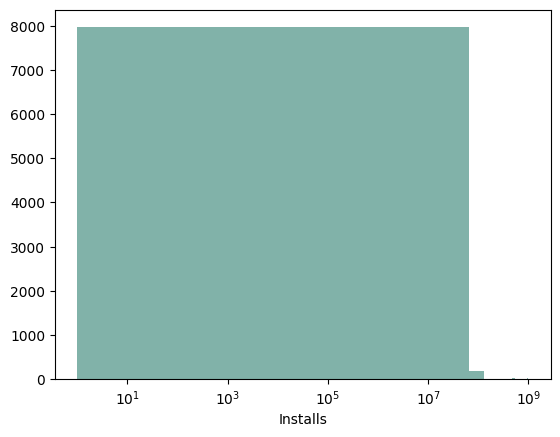

In [67]:
sns.histplot(apps.Installs, bins=15, linewidth=0)
plt.xscale('log')
plt.ylabel(None)
plt.show()

In [68]:
# % приложений с кол-вом установок < 10^8
100 * apps[apps.Installs < 100000000].App.count() / apps.App.count()

97.16935090287946

#### Большую часть приложений устанавливают менее 10^8 раз

## Взаимосвязи переменных

### Популярность приложения и его рейтинг

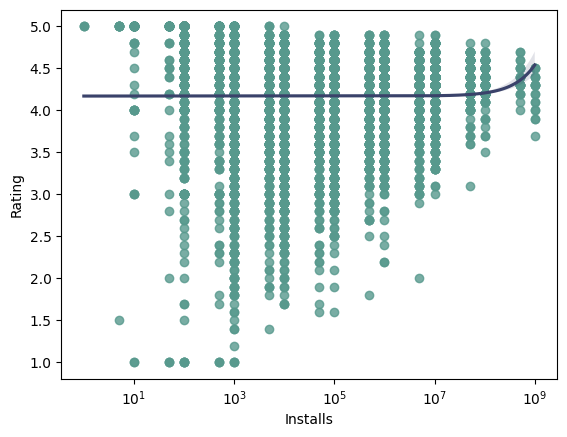

In [69]:
sns.regplot(x="Installs", y="Rating",data=apps, line_kws={"color": sns.cubehelix_palette(66, start=.5, rot=-.75)[-12]})
plt.xscale('log')

Приложения с большим количеством установок имеют чуть больший рейтинг в среднем

Проверим, как сильно влияет количество установок на рейтинг с помощью коэффициента корреляции Спирмена (коэффициент корреляции Пирсона использовать не можем, т.к. признаки распределены ненормально)

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Статистически значимая связь между переменными отсутствует

In [70]:
stats.spearmanr(apps.Installs, apps.Rating)

SpearmanrResult(correlation=0.027296334350120834, pvalue=0.013463458702114359)

p-value < 0.05, отвергаем нулевую гипотезу об отсутствии взаимосвязи. Коэффициент корреляции Спирмена показывает статистически значимую, но очень слабую (0.027) взаимосвязь

In [71]:
# Посчитаем коэф. Спирмена для большинства приложений (Installs < 10^8)
stats.spearmanr(apps[apps.Installs < 100000000].Installs, apps[apps.Installs < 100000000].Rating)

SpearmanrResult(correlation=0.011482743411910143, pvalue=0.3055485392414167)

p-value > 0.05, следовательно, не можем отвергуть нулевую гипотезу об отсутствии статистически значимой связи для большинства приложений

#### Вывод: Популярность приложения не влияет на его рейтинг

### Как отличается рейтинг платных и бесплатных приложений

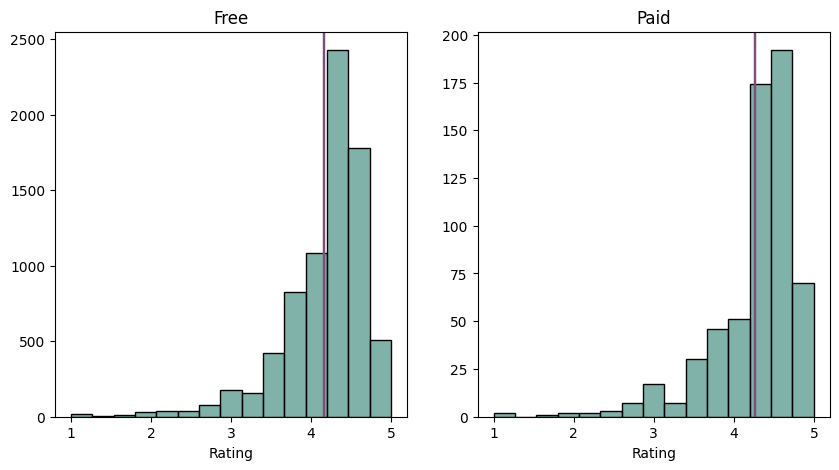

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(apps[apps.Type == 'Free']['Rating'], bins=15, ax=axs[0]).set(title='Free')
axs[0].axvline(apps[apps.Type == 'Free']['Rating'].mean(), linewidth=1.75, color='#7E4E7C')
axs[0].set_ylabel(None)
sns.histplot(apps[apps.Type == 'Paid']['Rating'], bins=15, ax=axs[1]).set(title='Paid')
axs[1].axvline(apps[apps.Type == 'Paid']['Rating'].mean(), linewidth=1.75, color='#7E4E7C')
axs[1].set_ylabel(None)
plt.show()

In [73]:
print('Средний рейтинг для бесплатных приложений:', round(apps[apps.Type == 'Free']['Rating'].mean(), 2))
print('Средний рейтинг для платных приложений:', round(apps[apps.Type == 'Paid']['Rating'].mean(), 2))

Средний рейтинг для бесплатных приложений: 4.17
Средний рейтинг для платных приложений: 4.26


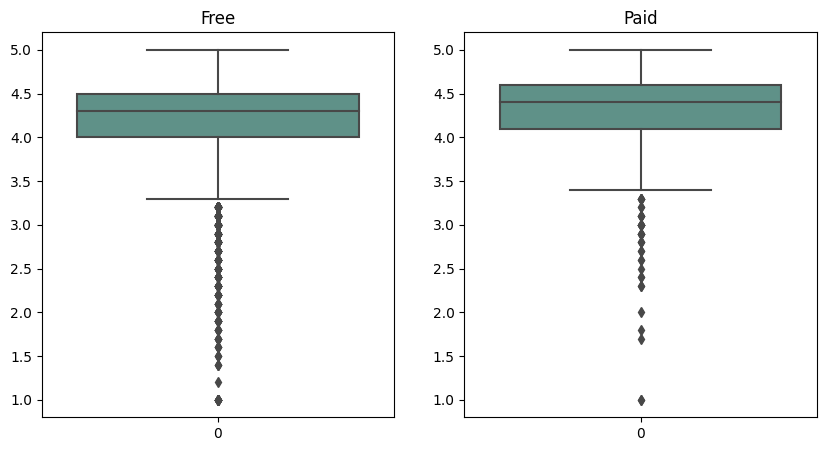

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(apps.loc[apps.Type == 'Free', 'Rating'], ax=axs[0]).set(title='Free')
sns.boxplot(apps[apps.Type == 'Paid']['Rating'].reset_index(drop=True), ax=axs[1]).set(title='Paid')
plt.show()

In [75]:
print('Размеры выборок:', apps[apps.Type == 'Free']['Rating'].shape[0], ',', apps[apps.Type == 'Paid']['Rating'].shape[0])

Размеры выборок: 7592 , 604


Для сравнения средних двух выборок воспользуемся тестом Стьюдента

Поскольку размеры выборок значительно отличаются, воспользуемся тестом Стьюдента с поправкой Уэлча

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Средние значения рейтинга для платных и бесплатных приложений равны

In [76]:
stats.ttest_ind(apps[apps.Type == 'Free']['Rating'], apps[apps.Type == 'Paid']['Rating'], equal_var=False)

Ttest_indResult(statistic=-3.951297123068955, pvalue=8.56904032307534e-05)

p-value < 0.05, поэтому мы можем отвергнуть нулевую гипотезу о равенстве средних

Таким образом, средний рейтинг для платных и бесплатных приложений статистически значимо различается

#### Вывод: Платные приложения в среднем оцениваются выше

### Рейтинг приложений по категориям

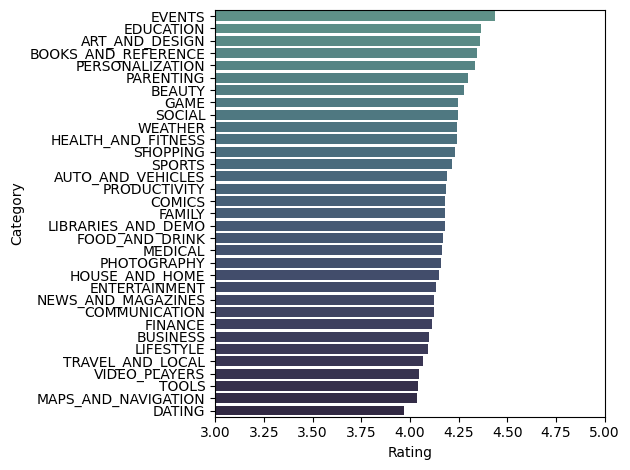

In [77]:
sns.barplot(x=apps.Rating, y=apps.Category, errcolor=sns.cubehelix_palette(66, start=.5, rot=-.75)[-12],
           order=apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).index, errorbar=None).set_xlim(3, 5)
plt.tight_layout()

In [91]:
apps.Category.value_counts()

FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

Проверим, является ли различие в рейтинге по категориям статистически значимым

У нас достаточно наблюдений во всех группах, чтобы воспользоваться ANOVA, не проверяя выборки на гомогенность и нормальность

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Распределения рейтинга равны для всех категорий

In [90]:
stats.f_oneway(*apps.groupby('Category')['Rating'].apply(list))

F_onewayResult(statistic=6.999354974962324, pvalue=3.4525319466034365e-30)

p-value < 0.05, отвергаем нулевую гипотезу о равенстве распределений

#### Вывод: Рейтинг приложений статистически значимо различается по категориям

#### Выше всего оценивают категории "События" и "Образование", ниже всего - дейтинговые приложения и карты

### Самые популярные категории

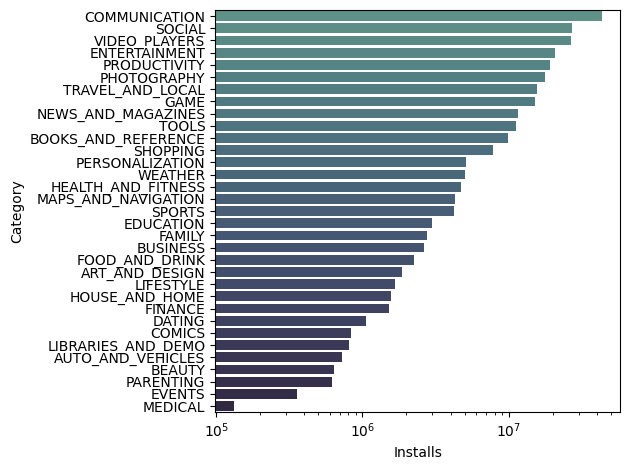

In [80]:
sns.barplot(x=apps.Installs, y=apps.Category, errcolor=sns.cubehelix_palette(66, start=.5, rot=-.75)[-12], errorbar=None,
           order=apps.groupby('Category')['Installs'].mean().sort_values(ascending=False).index)
plt.xscale('log')
plt.tight_layout()

Как и для предыдущей гипотезы, мы хотим узнать, является ли различие по категориям статистически значимым

In [92]:
apps.Category.value_counts()

FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

У нас достаточно наблюдений во всех группах, чтобы воспользоваться ANOVA, не проверяя выборки на гомогенность и нормальность

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Распределения кол-ва установок равны для всех категорий

In [93]:
stats.f_oneway(*apps.groupby('Category')['Rating'].apply(list))

F_onewayResult(statistic=6.999354974962324, pvalue=3.4525319466034365e-30)

p-value < 0.05, отвергаем нулевую гипотезу о равенстве распределений

#### Вывод: Кол-во скачиваний приложений статистически значимо отличается по категориям

#### Больше всего скачивают приложения для общения с другими людьми (COMMUNICATION, SOCIAL)

### Самые популярные возрастные категории

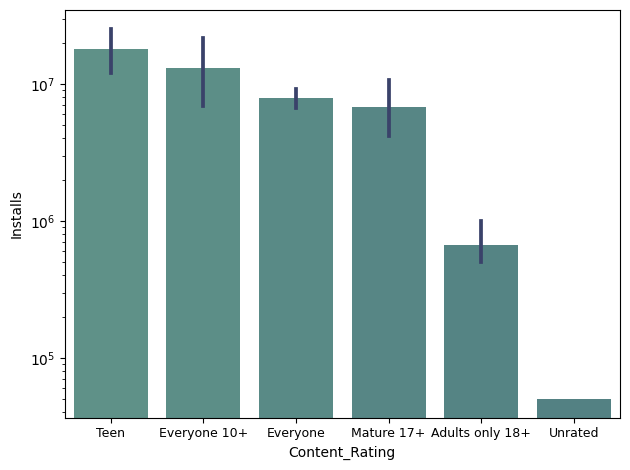

In [83]:
ax = sns.barplot(data=apps, x='Content_Rating', y='Installs', errcolor=sns.cubehelix_palette(66, start=.5, rot=-.75)[-12],
                order=apps.groupby('Content_Rating')['Installs'].mean().sort_values(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.yscale('log')
plt.tight_layout()

In [84]:
apps.groupby('Content_Rating')['Installs'].mean().sort_values(ascending=False)

Content_Rating
Teen               1.807791e+07
Everyone 10+       1.316769e+07
Everyone           7.883647e+06
Mature 17+         6.828719e+06
Adults only 18+    6.666667e+05
Unrated            5.000000e+04
Name: Installs, dtype: float64

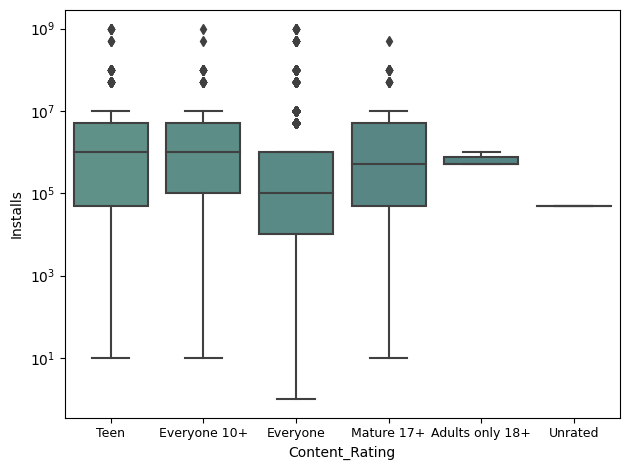

In [85]:
ax = sns.boxplot(x="Content_Rating", y="Installs", data=apps,
            order=apps.groupby('Content_Rating')['Installs'].mean().sort_values(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.yscale('log')
plt.tight_layout()

Как и для предыдущих гипотез, проверим, является ли различие между группами статистически значимым

In [94]:
apps.Content_Rating.value_counts()

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

У возрастных категорий "Adults only 18+" и "Unrated" слишком мало наблюдений, чтобы вообще делать какие-то выводы  
В остальных группах наблюдений достаточно, чтобы воспользоваться ANOVA, не проверяя выборки на гомогенность и нормальность

In [107]:
# создаем список со значениями installs, сгруппированными по первым четырем значениям Content_Rating
cont_rating_groups = [apps[apps.Content_Rating == x]['Installs'] for x in ('Everyone', 'Teen', 'Mature 17+', 'Everyone 10+')]

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Распределения кол-ва установок равны для всех категорий

In [105]:
stats.f_oneway(*cont_rating_groups)

F_onewayResult(statistic=8.87736075596025, pvalue=7.1738070038259545e-06)

p-value < 0.05, отвергаем нулевую гипотезу о равенстве распределений

#### Вывод: Кол-во скачиваний приложений статистически значимо различается для разных возрастных категорий

#### Приложения возрастной категории Teen популярнее остальных

### Размер приложения и его рейтинг

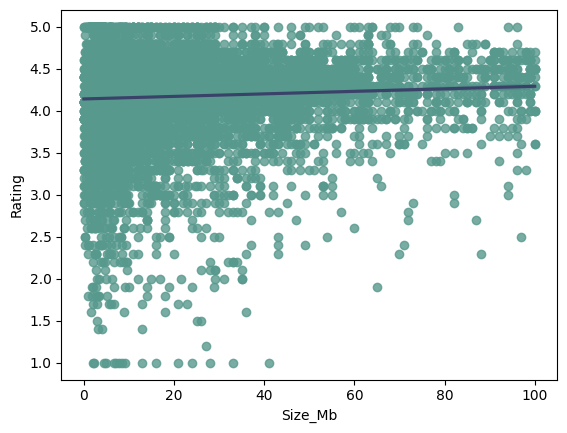

In [88]:
sns.regplot(x="Size_Mb", y="Rating",data=apps, line_kws={"color": sns.cubehelix_palette(66, start=.5, rot=-.75)[-12]})
plt.show()

Проверим, существует ли статистически значимая взаимосвязь между рейтингом приложения и его размером

<b>Порог значимости</b>: alpha = 0.05  
<b>Нулевая гипотеза</b>: Статистически значимая связь между переменными отсутствует

In [89]:
stats.spearmanr(apps.Size_Mb, apps.Rating)

SpearmanrResult(correlation=0.04775215256033189, pvalue=1.5260501638443366e-05)

p-value < 0.05, отвергаем нулевую гипотезу об отсутствии связи

Статистически значимая связь есть, но она, с моей точки зрения, незначительна (0.048) и не несет никакой пользы (никто не будет искусственно увеличивать размер своего приложения в надежде на то, что рейтинг тоже вырастет)

Наиболее полезным замечанием может быть следующее: <b>Если увеличить размер своего приложения, его рейтинг не упадет</b>

# Выводы:  
1. Популярность приложения не коррелирует с его рейтингом 
2. Платные приложения в среднем оцениваются выше  
3. Рейтинг приложений статистически значимо отличается у разных категорий. Выше всего оценивают приложения категорий "События" и "Образование", ниже всего - дейтинговые приложения и карты  
4. Больше всего скачивают приложения для общения с другими людьми  
5. Больше всего скачивают приложения для возрастной категории "Подростки"  
6. Размер приложения не коррелирует с его рейтингом